In [20]:
import pandas as pd
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv('preprocessed.csv', index_col=0)
data.head(5)

,merchant,category,amt,gender,street,city,zip,city_pop,job,merch_lat,merch_long,hour,age,is_fraud
0,1.519014,1.615782,-0.407826,-0.909206,-0.207491,-0.232599,-0.209999,-0.282589,-0.316898,-0.494354,0.593864,-1.878145,-0.872823,0
1,0.900957,1.548622,0.230039,-0.909206,-0.207491,-0.232599,-0.209999,-0.293670,-0.281569,2.078699,-2.030341,-1.878145,-0.314203,0
2,-0.667123,-0.616973,0.934149,1.099861,-0.207491,-0.232599,-0.209999,-0.280406,0.744516,0.902849,-1.592323,-1.878145,0.629736,0
3,-0.426116,-0.204031,-0.158132,1.099861,1.005067,1.135357,1.018859,-0.287742,0.155359,1.662886,-1.621848,-1.878145,0.343422,0
4,-0.367463,-0.493928,-0.177094,1.099861,-0.207491,-0.232599,-0.209999,-0.293835,-0.369541,0.026941,0.841909,-1.878145,-0.760752,0


## PCA Experiment for visualisation
* <font size=4>There is only one cluster of points belonging to normal transaction. Though there are some overlapping points in that main cluster, there are some clusters of positive points which are significantly different from the main cluster. </font>
* <font size=4>As the number of overlapping points are not visible from scatter plot a simple LR model is trained to understand the counts. As per the model there are ***6760 false negatives and only 746 true positives***, so the ***number of overlapping points is significantly high***</font>

In [7]:
def reduce_pca(X, n_comp = 2):
    pca = PCA(n_components=2)
    pca.fit(X)
    return pca.transform(X)

In [8]:
X = data.drop(columns=['is_fraud'], inplace=False)
X_reduced = reduce_pca(X)
y = (data['is_fraud'].values).reshape((-1,1))
data_pca = np.hstack((X_reduced, y))
data_pca = pd.DataFrame(data_pca, columns=['dim_0', 'dim_1', 'is_fraud'])
data_pca.head(5)

,dim_0,dim_1,is_fraud
0,-0.343949,2.713932,0.0
1,-0.296931,2.403526,0.0
2,0.013625,0.098639,0.0
3,1.775099,0.251521,0.0
4,-0.496179,0.197247,0.0


<Axes: xlabel='dim_0', ylabel='dim_1'>

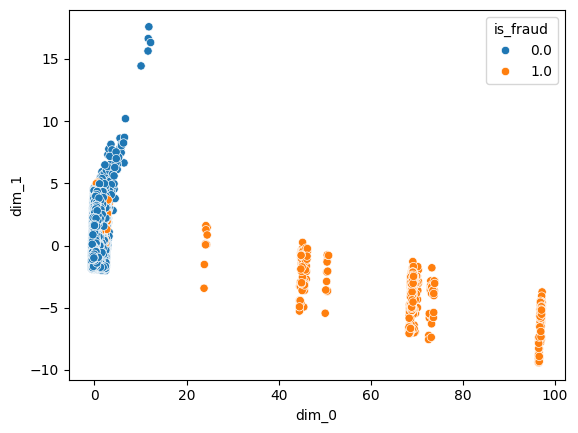

In [9]:
sns.scatterplot(data_pca, x='dim_0', y='dim_1', hue='is_fraud')

### Logistic regression on 2D data

In [30]:
lr = LogisticRegression(C=100)
lr.fit(X_reduced, y.ravel())
y_pred = lr.predict(X_reduced)
cm = confusion_matrix(y.ravel(), y_pred)
print(cm)

[[1289088      81]
 [   6760     746]]
